In [1]:
import pandas as pd 
marathon_results_2017 = pd.read_csv('./material/marathon_results_2017.csv')
marathon_2017 = marathon_results_2017.drop(['Unnamed: 0', 'Bib', 'Name', 'Age', 'City', 'State',
                                            'Country', 'Citizen', 'Unnamed: 9', 'Half', 'Pace',
                                            'Proj Time', 'Official Time', 'Overall', 'Gender',
                                           'Division'], axis='columns')
import numpy as np

In [3]:
marathon_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   M/F     26410 non-null  object
 1   5K      26410 non-null  object
 2   10K     26410 non-null  object
 3   15K     26410 non-null  object
 4   20K     26410 non-null  object
 5   25K     26410 non-null  object
 6   30K     26410 non-null  object
 7   35K     26410 non-null  object
 8   40K     26410 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


In [7]:
marathon_2017.head()

,M/F,5K,10K,15K,20K,25K,30K,35K,40K
0,M,925,1828,2744,3675,4619,5581,6499,7373
1,M,924,1827,2744,3675,4619,5581,6499,7394
2,M,925,1829,2744,3676,4620,5581,6511,7418
3,M,925,1829,2744,3679,4620,5581,6538,7475
4,M,925,1828,2744,3675,4619,5581,6521,7500


In [5]:
# convert to  timedelta
marathon_2017['5K'] = pd.to_timedelta(marathon_2017['5K'])
marathon_2017['10K'] = pd.to_timedelta(marathon_2017['10K'])
marathon_2017['15K'] = pd.to_timedelta(marathon_2017['15K'])
marathon_2017['20K'] = pd.to_timedelta(marathon_2017['20K'])
marathon_2017['25K'] = pd.to_timedelta(marathon_2017['25K'])
marathon_2017['30K'] = pd.to_timedelta(marathon_2017['30K'])
marathon_2017['35K'] = pd.to_timedelta(marathon_2017['35K'])
marathon_2017['40K'] = pd.to_timedelta(marathon_2017['40K'])

In [6]:
# convert to seconds
marathon_2017['5K'] = marathon_2017['5K'].astype('m8[s]').astype(np.int64)
marathon_2017['10K'] = marathon_2017['10K'].astype('m8[s]').astype(np.int64)
marathon_2017['15K'] = marathon_2017['15K'].astype('m8[s]').astype(np.int64)
marathon_2017['20K'] = marathon_2017['20K'].astype('m8[s]').astype(np.int64)
marathon_2017['25K'] = marathon_2017['25K'].astype('m8[s]').astype(np.int64)
marathon_2017['30K'] = marathon_2017['30K'].astype('m8[s]').astype(np.int64)
marathon_2017['35K'] = marathon_2017['35K'].astype('m8[s]').astype(np.int64)
marathon_2017['40K'] = marathon_2017['40K'].astype('m8[s]').astype(np.int64)

In [8]:
check_time = 7200
Lat = 0
Long = 0
Location = ''
points = [[42.247835, -71.474357], [42.274032, -71.423979], [42.282364, -71.364801],
          [42.297870, -71.284260], [42.324830, -71.259660], [42.345680, -71.215169], 
          [42.352089, -71.124979], [42.351510, -71.086980]]

marathon_location = pd.DataFrame(columns=['Lat', 'Long'])
for index, record in marathon_2017.iterrows():
    if(record['40K'] < check_time):
        Lat = points[7][0]
        Long = points[7][1]
    elif(record['35K'] < check_time):
        Lat = points[6][0]
        Long = points[6][1]    
    elif(record['30K'] < check_time):
        Lat = points[5][0]
        Long = points[5][1]        
    elif(record['25K'] < check_time):
        Lat = points[4][0]
        Long = points[4][1]        
    elif(record['20K'] < check_time):
        Lat = points[3][0]
        Long = points[3][1]        
    elif(record['15K'] < check_time):
        Lat = points[2][0]
        Long = points[2][1]        
    elif(record['10K'] < check_time):
        Lat = points[1][0]
        Long = points[1][1]        
    elif(record['5K'] < check_time):
        Lat = points[0][0]
        Long = points[0][1]        
    else:
        Lat = points[0][0]
        Long = points[0][1]
    marathon_location = marathon_location.append({'Lat': Lat, 'Long': Long}, ignore_index=True)

In [9]:
marathon_count = marathon_location.groupby(['Lat', 'Long']).size().reset_index(name='Count')

In [10]:
marathon_count

,Lat,Long,Count
0,42.274032,-71.423979,49
1,42.282364,-71.364801,4435
2,42.297870,-71.280000,13866
3,42.324830,-71.259660,7261
4,42.345680,-71.215169,737
5,42.351510,-71.080000,6
6,42.352089,-71.124979,56


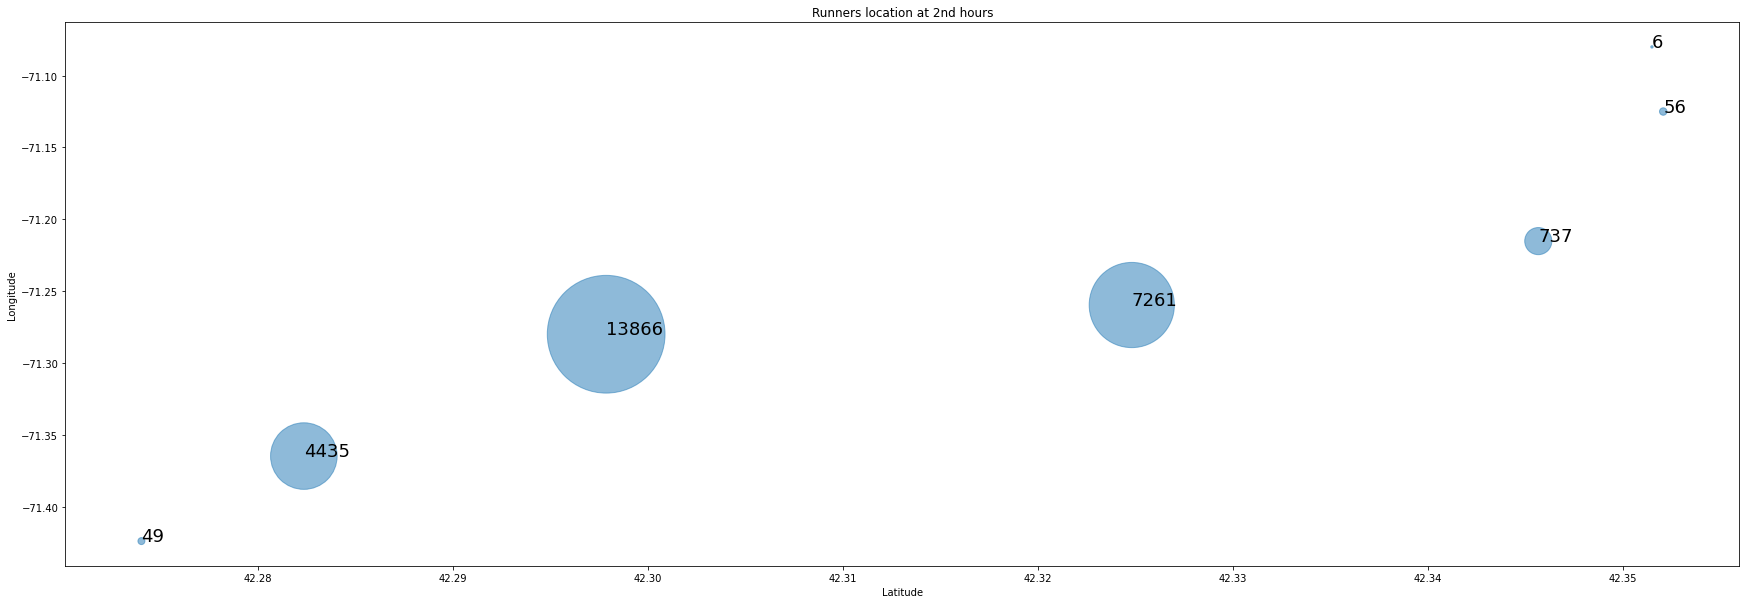

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.scatter(marathon_count.Lat, marathon_count.Long, s=marathon_count.Count, alpha=0.5)

for i, txt, in enumerate(marathon_count.Count):
    plt.annotate(txt, (marathon_count.Lat[i], marathon_count.Long[i]), fontsize=18)
    
plt.title('Runners location at 2nd hours')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.show()